Użyłem bibliotek matematycznych: sympy, numpy i matplotlib. Ostatnią z nich wykorzystałem wyłącznie do sporządzania wykresów.

Na początku wczytuję biblioteki i przygotowuję funkcję do rysowania wykresu. Generowane wykresy są grafiką wektorową.

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

number = -1
def wykres(title, Ox, label_x, Oy, label_y, label, scatter = False):
    if (scatter == True):
        plt.scatter(Ox, Oy, label = label)
    else:
        plt.plot(Ox, Oy, label = label)
    plt.suptitle(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()
    global number
    plt.savefig(str(number) + ".svg")
    number = number + 1
    plt.legend()

Wprowadzam do programu dane początkowe. Rozpatrywany przedział czasu to 0 ≤ t ≤ 2π/w<sub>0</sub>.

In [2]:
f = 1
s = 000000 #REDACTED, tutaj powinien być numer indeksu
ω0 = s + 1
b = ω0/4
#dodaję do wartości stop, ponieważ przedział ma być domknięty
czasPunkty = np.arange(0, 2*np.pi/ω0 + 2*np.pi/ω0/50, 2*np.pi/ω0/50) 

In [3]:
#sympy wymaga ścisłego nazewnictwa zmiennych i nieznanych funkcji
#stałe C1 i C2 są na razie zmiennymi, ponieważ najpierw trzeba je wyznaczyć
t, C1, C2 = symbols('t C1 C2')
x = symbols('x', cls=Function)

Tworzę funkcje przeprowadzające obliczenia związane z drganiami oscylatora.

In [4]:
def oscylator(ω, bWykres = False):
    #xt jest rozwiązaniem równania 'równanieRóżniczkowe'
    równanieRóżniczkowe = dsolve(Eq(x(t).diff(t, t) + b*x(t).diff(t) + ω0**2*x(t), f*sin(ω*t)), x(t))
    xt = sympify(równanieRóżniczkowe.rhs)
    #wyznaczam stałe z warunków początkowych
    stałe = solve([Eq(xt.subs(t, 0), 0), Eq(xt.diff(t).subs(t, 0), 0)])
    xt = xt.subs(C1, stałe[C1]).subs(C2, stałe[C2])
    odchyleniaPunkty = []
    for i in czasPunkty:
        odchyleniaPunkty.append(xt.subs(t, i).evalf())
    if (bWykres == True):
        wykres("Drgania oscylatora", czasPunkty, "Czas [s]", 
            odchyleniaPunkty, "Odchylenie [m]", "x(t)")
    else:
        return odchyleniaPunkty  
    
def oscylatorMax(ω):
    odchyleniaPunkty = oscylator(ω)
    maxamp = 0
    for punkt in odchyleniaPunkty:
        if (maxamp < np.absolute(punkt)):
            maxamp = np.absolute(punkt)
    return maxamp

# Podzadanie 1.
Tworzę wykresy dla:
- ω = √(ω<sub>0</sub><sup>2</sup> - b<sup>2</sup>/2)
- ω = 3/4√(ω<sub>0</sub><sup>2</sup> - b<sup>2</sup>/2)
- ω = 5/4√(ω<sub>0</sub><sup>2</sup> - b<sup>2</sup>/2)

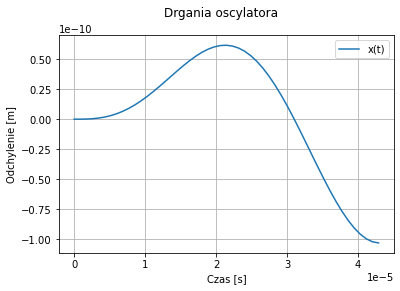

In [5]:
oscylator(sqrt(ω0**2 - b**2/2), True)

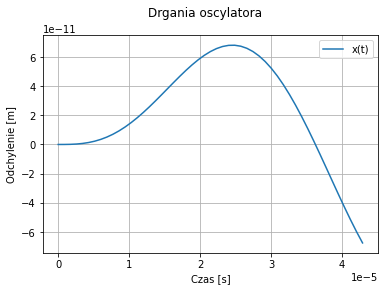

In [6]:
oscylator(sqrt(ω0**2 - b**2/2)*3/4, True)

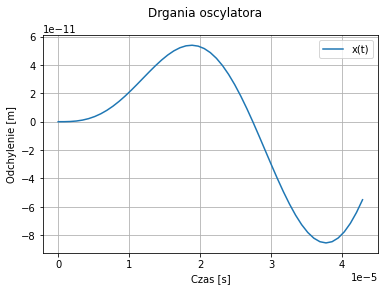

In [7]:
oscylator(sqrt(ω0**2 - b**2/2)*5/4, True)

## Wnioski

Zmiana częstości siły wymuszonej daje efekt podobny do przesunięcia fazowego i wydłużenia długości fali. Efekty wydają się być wprost propocjonalne do wartości częstości siły. Ponadto amplituda drgań w rozpatrywanym zakresie zmienia się. Łatwo dostrzec, że ostatnia zależność na pewno nie jest wprost proporcjonalna do częstości.

# Podzadanie 2.

Znajduję maksymalne amplitudy dla zadanych wartości ω<sub>k</sub> = 1/k√(ω<sub>0</sub><sup>2</sup> - b<sup>2</sup>/2) i rysuję wykres punktowy z tych danych.

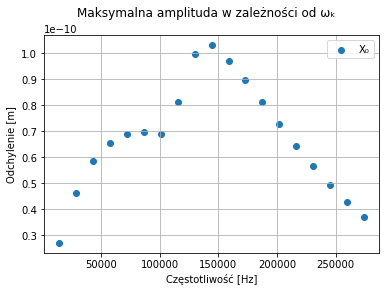

In [8]:
maxAmplitudy = []
częstotliwość = []
punktyWykres = []
for k in range(1, 20): 
    częstotliwość.append(k/10 * sqrt(ω0**2 - b**2/2))
    maxAmplitudy.append(oscylatorMax(częstotliwość[k-1]))
    punktyWykres.append((częstotliwość[k-1], maxAmplitudy[k-1]))
    
wykres("Maksymalna amplituda w zależności od ωₖ", częstotliwość, "Częstotliwość [Hz]", 
            maxAmplitudy, "Odchylenie [m]", "X₀", True)


Poniżej wygenerwałem tablicę, która opisuje dane, z których powstał wykres powyżej.

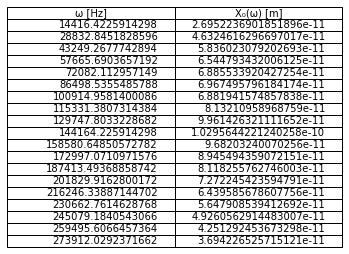

In [9]:
daneTablica = np.append(np.array(częstotliwość).astype('float').reshape(19,1),
                        np.array(maxAmplitudy).astype('float').reshape(19,1), axis = 1)
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.table(colLabels = ['ω [Hz]', "X₀(ω) [m]"], cellText = daneTablica, loc='center');

# Podzadanie 3.

Łatwo odczytać z tabeli, że największa amplituda maksymalna występuje dla częstotliwości ω<sub>max</sub> = √(ω<sub>0</sub><sup>2</sup> - b<sup>2</sup>/2) = 144164,225914298. W takim razie połowa tego odchylenia wynosi:

In [10]:
maxAmpHalf = np.max(maxAmplitudy)/2
print(maxAmpHalf)

5.14782211062013e-11


Kazałem skryptowi spróbować wyznaczyć wielomian, który połączy wszystkie punkty z wykresu z pkt 2.

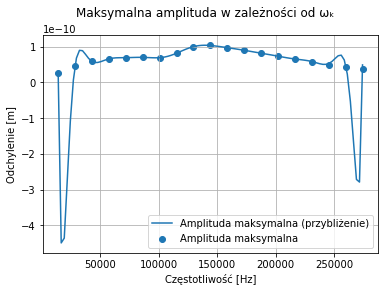

In [11]:
plt.scatter(częstotliwość, maxAmplitudy, label = "Amplituda maksymalna")

z = symbols('z')
funkcjaAmplitudy = interpolate(punktyWykres, z)

danex = np.arange(częstotliwość[0], częstotliwość[18], (częstotliwość[18] - częstotliwość[0])/100)
daney = []
for i in danex:
    daney.append(funkcjaAmplitudy.subs(z, i).evalf())
    
wykres("Maksymalna amplituda w zależności od ωₖ", danex, "Częstotliwość [Hz]", 
            daney, "Odchylenie [m]", "Amplituda maksymalna (przybliżenie)")

Obliczam równanie, które znajdzie na wykresie przybliżone punkty o amplitudzie X<sub>0</sub>(ω<sub>max</sub>)/2.

In [12]:
print(solve([Eq(funkcjaAmplitudy, maxAmpHalf), z >= częstotliwość[0], z <= częstotliwość[18]]).atoms(Number))
print(oscylatorMax(29035.6385650065), oscylatorMax(259689.546628306), oscylatorMax(273885.124825446))

{29072.7885415344, 244384.145151926, 259292.796040119, 237867.289259974}
4.65285629852275e-11 4.24200073061919e-11 3.69463540205996e-11


Oczekiwałem 2 punktów, a dostałem 3. Wynika to z tego, że operuję na wielomianowym przybliżeniu funkcji. Szukam częstości, dla których maksymalna amplituda wynosi 1/2 największej maksymalnej amplitudy. Ten proces trwa dość długo.

In [13]:
#coś w stylu przeszukiwania binarnego, ale operuję na przedziale, czyli teoretycznie nieskończenie licznym zbiorze. 
#tak naprawdę te operacje z każdą iteracją przybliżają do rozwiązania, sprowadzając poszukiwania do zbiorów o mniejszej mocy
point1 = [29035.6385650065, oscylatorMax(29035.6385650065)]
gainer = 1000
while point1[1] != maxAmpHalf:
    while point1[1] > maxAmpHalf:
        point1[0] -= gainer
        point1[1] = oscylatorMax(point1[0])
    while point1[1] < maxAmpHalf:
        point1[0] += gainer
        point1[1] = oscylatorMax(point1[0])
    gainer /= 10
        
point2 = [259689.546628306, oscylatorMax(259689.546628306)]
gainer = 1000
while point2[1] != maxAmpHalf:
    while point2[1] > maxAmpHalf:
        point2[0] += gainer
        point2[1] = oscylatorMax(point2[0])
    while point2[1] < maxAmpHalf:
        point2[0] -= gainer
        point2[1] = oscylatorMax(point2[0])
    gainer /= 10

Upewniam się, że punkty stanowią połowę największej maksymalnej amplitudy drgań, przedstawiając je graficznie.

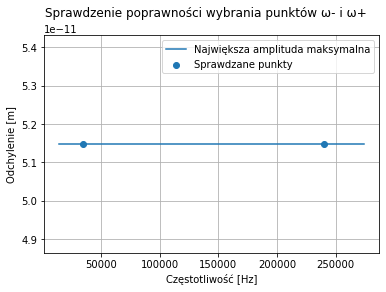

In [14]:
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], label = "Sprawdzane punkty")

wykres("Sprawdzenie poprawności wybrania punktów ω- i ω+", [częstotliwość[0], częstotliwość[-1]], "Częstotliwość [Hz]", 
            [maxAmpHalf, maxAmpHalf], "Odchylenie [m]", "Największa amplituda maksymalna")

In [15]:
print(point1[0], point2[0], point2[0] - point1[0])

34249.66455065847 240370.4857188764 206120.82116821795


Zatem poszukiwane ω<sub>max</sub> = 144164,225914298; ω<sub>+</sub> = 240370,4857188764; ω<sub>-</sub> = 34249,66455065847; Δω = 206120,82116821795.